# Importing General Libraries

In [2]:
# general libraries
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks  as cf
#import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)
cf.go_offline()
import plotly.graph_objects as go
%matplotlib inline

import math

In [3]:
model_data = pd.read_csv("cleaned_data_set.csv")

In [4]:
model_data.head(60)

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age_category,aggregate_std_types,aggregate_tests
0,0,18,4.0,15.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Teenagers,0.0,0
1,1,15,1.0,14.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Teenagers,0.0,0
2,2,34,1.0,17.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Young Adults,0.0,0
3,3,52,5.0,16.0,4.0,1.0,37.000000,37.000000,1.0,3.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,Middle Aged,0.0,0
4,4,46,3.0,21.0,4.0,0.0,0.000000,0.000000,1.0,15.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Adults,0.0,0
5,5,42,3.0,23.0,2.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Adults,0.0,0
6,6,51,3.0,17.0,6.0,1.0,34.000000,3.400000,0.0,0.00,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,1,Middle Aged,0.0,3
7,7,26,1.0,26.0,3.0,0.0,0.000000,0.000000,1.0,2.00,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Youth,0.0,0
8,8,45,1.0,20.0,5.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,0,0,0,0,Adults,0.0,0
9,9,44,3.0,15.0,2.0,1.0,1.266973,2.800000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Adults,0.0,0


In [5]:
model_data.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [6]:
model_data.isna().sum() > 0

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [18]:
#making a copy of the dataset 
model_df = model_data.copy()

In [19]:
#checking the proportion of the class labels

fig = px.histogram(
    model_df,
    x = "Dx:Cancer",
    color_discrete_sequence=["darkorchid"],
    opacity= 0.8,
    width = 500,
    height = 600   
)
fig.update_layout(bargap = 0.1)
fig.update_layout(title = "Class Label Proportion"),
fig

# Importing Machine Learning Libraries

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE, ADASYN

# Dealing With Imabalanced Dataset

In [21]:
X = model_df.drop(columns=["Dx:Cancer", "Age_category"], axis = 1)
y = model_df["Dx:Cancer"].copy()

In [22]:
#from the above bar plot, the class labels for the dataset is imbalanced, hence we would use a technique called ADASYN

adasyn_model_cervical = ADASYN(random_state = 777)
X_synthetic, y_synthetic = adasyn_model_cervical.fit_resample(X, y)
model_training_df = X_synthetic.join(y_synthetic)

In [23]:
#checking to see in the imbalanced class labels have been dealt with

fig = px.histogram(
    model_training_df,
    x = "Dx:Cancer",
    color_discrete_sequence=["darkorchid"],
    opacity= 0.8,
    width = 500,
    height = 600   
)

fig.update_layout(bargap = 0.1)
fig.update_layout(title = "Updated Class Label Proportions"),
fig


# Dividing The Dataset for Training and Testing


In [24]:
model_training_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,aggregate_std_types,aggregate_tests,Dx:Cancer
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0.0,0,1
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0


In [14]:
update_df = model_training_df[["Dx", "Dx:HPV", "STDs:HPV", "Hormonal Contraceptives (years)", "IUD", "First sexual intercourse", "Smokes (packs/year)", "Dx:Cancer"]]

In [28]:
training_set, testing_set = train_test_split(model_training_df.drop(columns=["aggregate_std_types", "aggregate_tests"]), test_size=0.23, random_state=773)

In [25]:
#data set with the most important features
training_set2, testingset2 = train_test_split(update_df, test_size = 0.23, random_state=773)

In [29]:
training_set.shape

(1291, 34)

In [26]:
training_set2.shape

(1291, 8)

In [30]:
testing_set.shape

(386, 34)

In [17]:
testingset2.shape

(386, 8)

In [31]:
ytrain = training_set2["Dx:Cancer"]

In [32]:
ytrain2 = training_set["Dx:Cancer"]

In [33]:
Xtrain = training_set2.drop(columns=["Dx:Cancer"],axis=1)

In [34]:
Xtrain2 = training_set.drop(columns=["Dx:Cancer"],axis=1)

In [35]:
ytest = testingset2["Dx:Cancer"]
Xtest = testingset2.drop(columns=["Dx:Cancer"],axis=1)

In [36]:
ytest2 = testing_set["Dx:Cancer"]
Xtest2 = testing_set.drop(columns=["Dx:Cancer"],axis=1)

# Standardize the Dataset

In [37]:
#data standardizer for scaling dataset with most important features
scaler = StandardScaler()

In [38]:
#data standardizer for scaling dataset almost all features
scaler2 = StandardScaler()

In [39]:
Xtrain_scale = scaler.fit_transform(Xtrain)
Xtest_scale = scaler.transform(Xtest)

In [40]:
Xtrain_scale2 = scaler.fit_transform(Xtrain2)
Xtest_scale2 = scaler.transform(Xtest2)

# Model Training For Feature Importance

In [41]:
#model training on most important feature
model = LogisticRegression().fit(Xtrain_scale, ytrain)

In [42]:
#model training with almost all features of the data set
model2 = LogisticRegression().fit(Xtrain_scale2, ytrain)

In [43]:
#training accuracy for model with most important features
100*(model.score(Xtrain_scale, ytrain))

99.53524399690163

In [44]:
#training accuracy for model with almost all features
100*(model2.score(Xtrain_scale2, ytrain2))

99.92254066615027

# Obtaining feature importance with the model weights

In [45]:
model2.coef_[0]

array([ 0.06655837,  0.22095565,  0.43867801,  0.16365998, -0.6673847 ,
        0.18866823,  0.42593184, -0.22816848,  0.46688489,  0.44421201,
        0.296856  ,  0.34123047,  0.11014504, -0.27101572,  0.        ,
       -0.01560637, -0.27101572, -0.17439281,  0.        , -0.03178718,
       -0.04937893,  0.        , -0.1335634 , -0.01446122,  0.90946512,
       -0.22134481, -0.57349159,  3.4873086 ,  3.50321911, -0.17134664,
        0.27354145, -0.35674026, -0.04111346])

In [46]:
model_weights = [weight for weight in  model2.coef_[0]]

In [47]:
feature_names = [feature for feature in Xtrain2.columns]

In [48]:
feature_importance = pd.DataFrame(feature_names, columns = ["Features"])

In [49]:
feature_importance["Importance Ranking"] = np.exp(np.array(model_weights))

In [50]:
feature_importance = feature_importance.sort_values(by=["Importance Ranking"], ascending=False)

In [51]:
feature_importance

,Features,Importance Ranking
28,Dx,33.222226
27,Dx:HPV,32.697826
24,STDs:HPV,2.482994
8,Hormonal Contraceptives (years),1.595018
9,IUD,1.559261
2,First sexual intercourse,1.550656
6,Smokes (packs/year),1.531016
11,STDs,1.406677
10,IUD (years),1.345622
30,Schiller,1.314612


In [52]:
#visualizing the feature importance
fig = px.bar(
    feature_importance,
    x = "Importance Ranking",
    color = "Features",
    opacity= 0.8,
    width = 800,
    height = 600   
)
fig.update_layout(bargap = 0.25)
fig.update_layout(title = "Feature Importance"),
fig

# Predicting Test Set

In [53]:
#predicting the model accuracy for model trained with most important features
score = model.predict(Xtest_scale)

In [55]:
#predicting the model accuracy for model trained on almost all features
score2 = model2.predict(Xtest_scale2)

In [56]:
#test accuracy for model trained with most important featutres
score_acc = accuracy_score(score, ytest.values)
print("Test accuracy: {:2f}%".format(score_acc * 100))

Test accuracy: 99.481865%


In [57]:
#test accuracy for model trained with almost all featutres
score_acc2 = accuracy_score(score2, ytest2.values)
print("Test accuracy: {:2f}%".format(score_acc2 * 100))

Test accuracy: 100.000000%


In [58]:
#visualization of model result
print(confusion_matrix(ytest, score))
print("  ")
print(classification_report(ytest, score))

[[190   1]
 [  1 194]]
  
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.99      0.99      0.99       195

    accuracy                           0.99       386
   macro avg       0.99      0.99      0.99       386
weighted avg       0.99      0.99      0.99       386



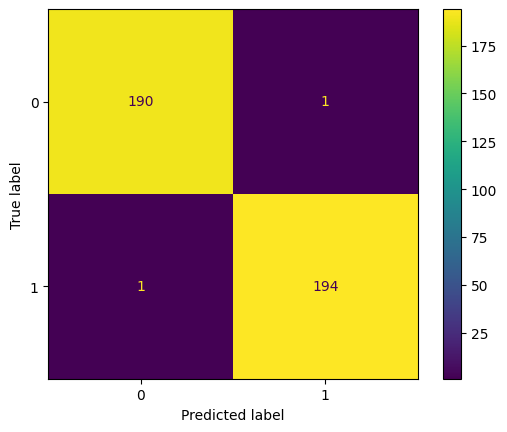

In [59]:
cm = confusion_matrix(ytest, score, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.grid(False)

# Optimizing Model Performance

In [60]:
param_grid = {"C": [100, 10, 1.0, 0.1, 0.01], "solver": ["newton-cg", "lbfgs", "liblinear"]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 6)
grid.fit(Xtrain_scale, ytrain.values)

print("Best Cross validation score: {:.25}%".format(grid.best_score_))
print("Best Parameters: ", grid.best_params_)

Best Cross validation score: 0.9961312087281078975209425%
Best Parameters:  {'C': 1.0, 'solver': 'newton-cg'}


In [61]:
pred = grid.predict(Xtest_scale)

In [62]:
pred_score = accuracy_score(ytest, pred)
pred_score

0.9948186528497409

In [63]:
print(confusion_matrix(ytest, pred))

[[190   1]
 [  1 194]]


In [88]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.99      0.99      0.99       195

    accuracy                           0.99       386
   macro avg       0.99      0.99      0.99       386
weighted avg       0.99      0.99      0.99       386



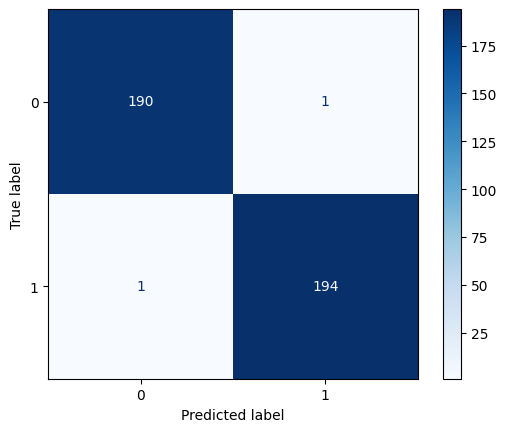

In [95]:
cm2 = confusion_matrix(ytest, pred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model.classes_)

#display.plot()
#plt.grid(False)

display.plot(cmap=plt.cm.Blues)

plt.show()


# Saving the model and StandardScaler Transformer

In [479]:
import pickle

In [480]:
file_path_object = open("/Users/rahmonolusegunadeniji/Documents/Project/model_and_transformer/model.pkl", "wb")

pickle.dump(model, file_path_object)

file_path_object.close()

In [481]:
file_path_object_scaler = open("/Users/rahmonolusegunadeniji/Documents/Project/model_and_transformer/scaler.pkl", "wb")

pickle.dump(scaler, file_path_object_scaler)

file_path_object_scaler.close()

# Trying the LASSO Model

In [84]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler



# Create a Lasso regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter (lambda)

# Fit the model to the training data
lasso.fit(Xtrain_scale, ytrain.values)

ypred_lasso = lasso.predict(Xtest_scale)

test_score = accuracy_score(ytest, ypred_lasso)

# Evaluate the model on the test set
#test_score = lasso.score(Xtest_scale, ypred_lasso)
print("Test R-squared score:", test_score)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [87]:
ypred_lasso.shape

(386,)

In [66]:
#visualization of model result
print(confusion_matrix(ytest, ypred_lasso))
print("  ")
print(classification_report(ytest,ypred_lasso))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
cm3 = confusion_matrix(ytest, pred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model.classes_)
display.plot()
plt.grid(False)

In [97]:
feature_importance["Lasso_coefficients"] = pd.DataFrame(lasso.coef_)

In [98]:
feature_importance.sort_values(by="Importance Ranking", ascending=False)

,Features,Importance Ranking,Lasso_coefficients
28,Dx,33.222226,0.134658
27,Dx:HPV,32.697826,0.247905
24,STDs:HPV,2.482994,0.000000
8,Hormonal Contraceptives (years),1.595018,0.000000
9,IUD,1.559261,0.000000
2,First sexual intercourse,1.550656,0.000000
6,Smokes (packs/year),1.531016,0.000000
11,STDs,1.406677,0.000000
10,IUD (years),1.345622,0.015982
30,Schiller,1.314612,0.000000
